In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import seaborn as sns
sns.set()

In [27]:
df     = pd.read_csv("data/lyrical_genius.csv")

df = df[((df["Genre"] != "pop"))]
df = df.drop(columns="Unnamed: 0")
df = df.drop_duplicates(subset=["Name","Artist"],keep=False)

genres = df["Genre"].unique()
unique_colors = [
    '#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080'
]
colors = {}
i = 0
for genre in genres:
    colors[genre] = unique_colors[i]
    i+=1
colors_list = [colors[genre] for genre in genres]
df.head()

,Unnamed: 0.1,Genre,Id,Popularity,Is_Exp,Name,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature,Lyrics
0,0,rnb,3ibKnFDaa3GhpPGlOUj7ff,80,False,Let Me Love You,Mario,0.656,0.578,7,-8.970,0,0.0922,0.2350,0.0,0.1180,0.556,94.514,4,"Mmmm Mmmmm Yeah Mmmmm Yeah, yeah, yeah Mmmm Y..."
1,1,rnb,2aIdVb8v9KTpEZnftkz2mD,78,False,Buy U a Drank (Shawty Snappin'),T-Pain,0.451,0.550,1,-8.137,1,0.2620,0.0108,0.0,0.0737,0.594,80.001,4,None
2,3,rnb,7DFnq8FYhHMCylykf6ZCxA,69,False,Yo (Excuse Me Miss),Chris Brown,0.536,0.612,4,-5.847,1,0.2720,0.1190,0.0,0.2090,0.570,86.768,4,Let’s get ONE. THING. STRAIGHT! Certain shit ...
3,4,rnb,39YovPslPCXbFYhlYjsZ2Y,67,False,Don't Mess With My Man,Nivea,0.879,0.730,11,-4.369,0,0.1640,0.1140,0.0,0.2410,0.885,99.925,4,"] Uh, I like it baby, uh Uh, one time for the..."
4,5,rnb,3LmvfNUQtglbTrydsdIqFU,72,False,We Belong Together,Mariah Carey,0.838,0.469,0,-7.992,1,0.0835,0.0358,0.0,0.0928,0.778,139.975,4,"Ooh, oh oh Sweet love, yeah I didn't mean i..."


In [28]:
df["Genre"].value_counts()

classical    2792
country       898
edm_dance     845
hiphop        406
rock          377
rnb           326
Name: Genre, dtype: int64

In [29]:
x_cols    = ["Is_Exp","Danceability","Energy","Key","Loudness","Mode","Speechiness","Acousticness","Instrumentalness","Liveness","Valence","Tempo","Time_Signature"]
y_cols    = ["Genre"]
meta_cols = ["Id","Popularity","Name","Artist"]

In [30]:
X,y,meta = df[x_cols],df[y_cols].iloc[:,0],df[meta_cols]

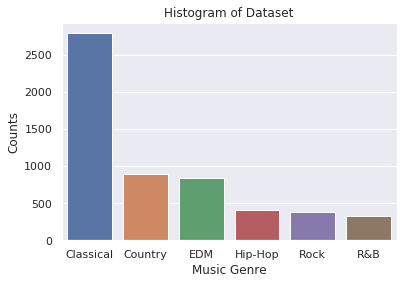

In [46]:
hist_data = dict(y.value_counts())
niceg = ["Classical","Country","EDM","Hip-Hop","Rock","R&B"]
keys = list(hist_data.keys())
vals = list(hist_data.values())
datum= {
    "Music Genre": niceg,
    "Frequency":   vals
}
g = sns.barplot(x="Music Genre", y="Frequency", data=datum)
plt.xlabel("Music Genre")
plt.ylabel("Counts")
plt.title("Histogram of Dataset")
plt.show(g)

In [7]:
# plt.pie(vals,labels=keys ,colors=colors_list)
# plt.show()

In [8]:
X.describe()

,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_Signature
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.458717,0.391874,5.141212,-15.374277,0.650602,0.069483,0.574284,0.378146,0.161922,0.345680,111.374301,3.823175
std,0.224164,0.319818,3.492491,9.220183,0.476822,0.074585,0.407977,0.402080,0.134339,0.282913,29.842841,0.547177
min,0.000000,0.000243,0.000000,-50.847000,0.000000,0.000000,0.000001,0.000000,0.019000,0.000000,0.000000,0.000000
25%,0.269000,0.082200,2.000000,-22.637250,0.000000,0.037800,0.095800,0.000015,0.087900,0.075975,86.081500,4.000000
50%,0.464000,0.318000,5.000000,-13.783000,1.000000,0.044500,0.760000,0.137500,0.112000,0.283000,110.866500,4.000000
75%,0.641000,0.690000,8.000000,-7.011750,1.000000,0.059500,0.967000,0.852000,0.177000,0.566000,129.973000,4.000000
max,0.964000,0.998000,11.000000,0.634000,1.000000,0.880000,0.996000,0.991000,0.979000,0.982000,216.115000,5.000000


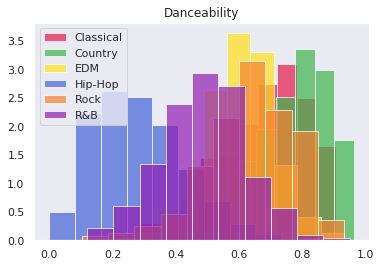

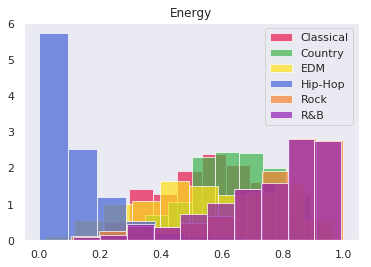

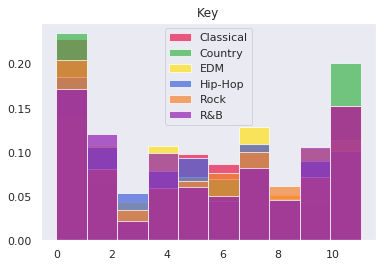

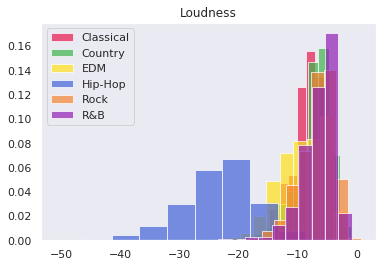

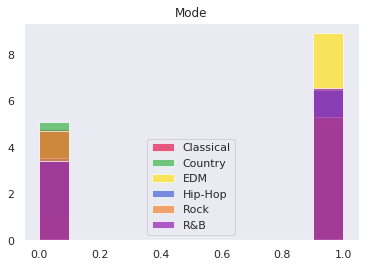

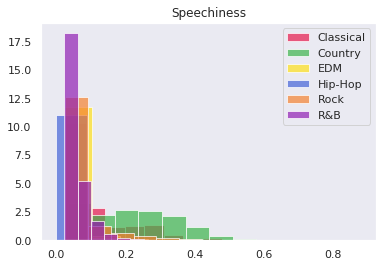

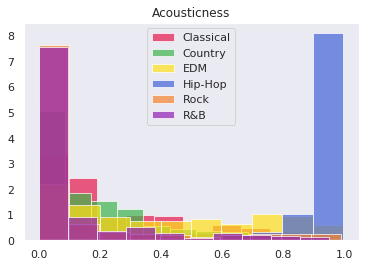

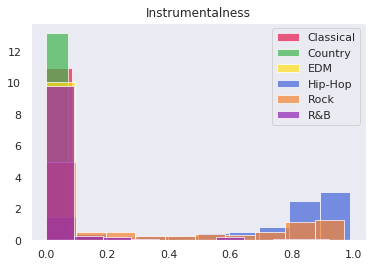

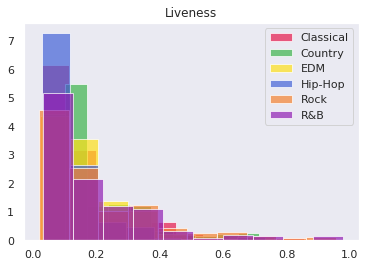

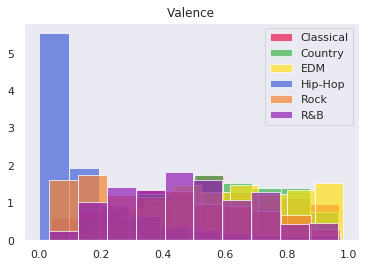

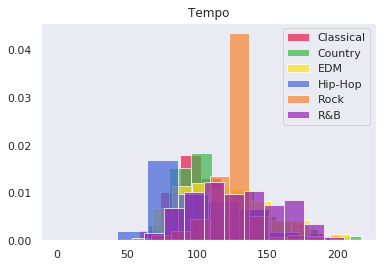

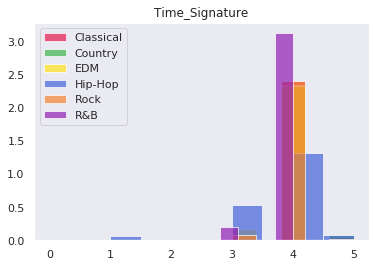

In [50]:
for label, content in X.iteritems():
    if label != "Is_Exp":
        for i in range(len(niceg)):
            plt.hist(content[df["Genre"] == genres[i]],label=niceg[i],color=colors[genres[i]],density=1,alpha=.7)
            plt.title(label)
            plt.grid(False)
        plt.legend()
        plt.show()
        

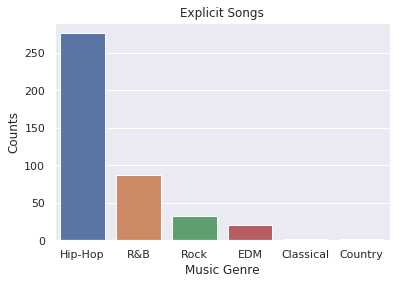

In [82]:
bad = df[df["Is_Exp"]==True]
count1=  list(bad["Genre"].value_counts())
datum = {
    "x": ["Hip-Hop","R&B","Rock","EDM","Classical","Country"],
    "y": count1
}
h = sns.barplot(x="x",y="y", data=datum)
plt.xlabel("Music Genre")
plt.ylabel("Counts")
plt.title("Explicit Songs")
plt.show(h)

In [80]:
bad["Genre"].value_counts()

hiphop       276
rnb           87
rock          32
edm_dance     21
classical      2
country        2
Name: Genre, dtype: int64

In [10]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2"])

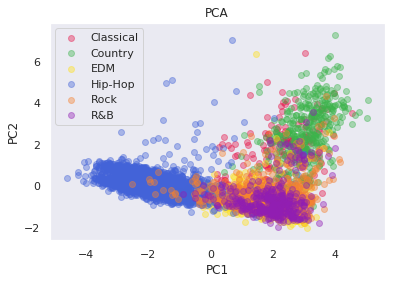

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)


for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    xs   = prin_df["PC1"][mask]
    ys   = prin_df["PC2"][mask]
    ax.scatter(xs,ys, c=color,alpha=.4)
ax.grid(True)
ax.legend(niceg)
ax.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.savefig("brit_cool.png")

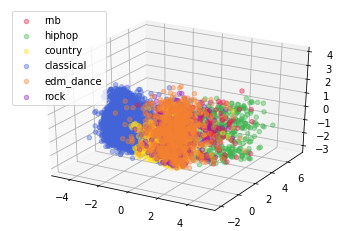

In [12]:
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(scaled_X)
prin_df   = pd.DataFrame(data=prin_comp, columns=["PC1","PC2","PC3"])

# %matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for genre, color in zip(genres, colors_list):
    mask = list(df["Genre"] == genre)
    ax.scatter(prin_df["PC1"][mask], prin_df["PC2"][mask], prin_df["PC3"][mask], c=color,alpha=.4)

    
ax.legend(genres)
ax.grid()

In [13]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,y, test_size=.2, random_state=1234, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression(solver="lbfgs", multi_class="ovr")
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
training = clf.score(X_train, y_train)
testing  = clf.score(X_test,  y_test)
print("Training Accuracy: {}".format(training))
print("Testing  Accuracy: {}".format(testing))

Training Accuracy: 0.8250276854928018
Testing  Accuracy: 0.8255093002657219


In [17]:
from sklearn.neighbors import KNeighborsClassifier

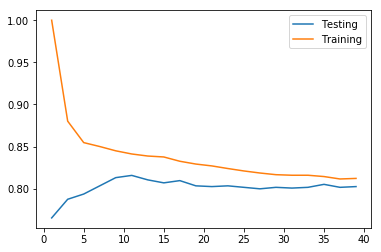

In [18]:
ns = []
test_scores = []
train_scores = []
for n in range(1,40,2):
    classifier = KNeighborsClassifier(n_neighbors=n)  
    classifier.fit(X_train, y_train)  
    y_pred = classifier.predict(X_test)  
    training = classifier.score(X_train, y_train)
    testing  = classifier.score(X_test,  y_test)
    
    ns.append(n)
    test_scores.append(testing)
    train_scores.append(training)
plt.plot(ns,test_scores,label="Testing")
plt.plot(ns, train_scores,label="Training")
plt.legend()
plt.show()

The best k for KNN seems to be when $k=11$ as both the training and testing accuracies reach a monotonic state here.

In [19]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn import tree

In [20]:
def cv_performance(clf, X, y, kf, metrics=["accuracy"]) :
    """
    Splits the data, X and y, into k-folds and runs k-fold cross-validation.
    Trains classifier on k-1 folds and tests on the remaining fold.
    Calculates the k-fold cross-validation accuracy for classifier
    by averaging the performance across folds.
    
    Adapted for HW6
    """
    y=np.array(y.tolist())
    k = kf.get_n_splits(X, y)
    m = len(metrics)
    scores = np.empty((m, k))
    m=0
    for k, (train, test) in enumerate(kf.split(X, y)) :
        X_train = X[train]
        X_test = X[test]
        y_train = y[train]
        y_test = y[test]
        clf.fit(X_train, y_train)
        # use Decision_tree_classifier.predict to make predictions
        y_pred = clf.predict(X_test)
        score = clf.score(X_test, y_test)
        scores[m,k] = score
            
    return scores.mean(axis=1) # average across columns

In [21]:
def select_params(X, y, kf, metrics=["accuracy"]) :
    """
    Sweeps different settings for the hyperparameters of a Decision Tree classifier,
    calculating the k-fold CV performance for each setting and metric,
    then selects the hyperparameters that maximize the average performance for each metric.
    
    Adapted from HW6
    """

    # part 4b: for each metric, select optimal hyperparameters using cross-validation
    
    # create grid of hyperparameters
    # hint: use a small 2x2 grid of hyperparameters for debugging
    depth_range = range(5,21)
    min_samples_range = range(1,15)
    scores = np.empty((len(metrics), len(depth_range), len(min_samples_range)))

    # compute CV scores using cv_performance(...)
    for depth_ind, max_depth in enumerate(depth_range):
        for samples_ind, min_samples in enumerate(min_samples_range):
            clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=min_samples) 
            # compute CV scores using cv_performance(...)
            score = cv_performance(clf, X, y, kf, metrics)
            scores[:,depth_ind,samples_ind] = score
    
    # get best hyperparameters
    best_params = []
    for met_ind, metric in enumerate(scores):
        print (metrics[met_ind])
        print ("maximum score is", metric.max())
        depth_ind, samples_ind = np.unravel_index(metric.argmax(), metric.shape)
        params = (depth_range[depth_ind], min_samples_range[samples_ind])
        print( "max_depth, min_samples=", params)
        best_params.append(params)
    
    return best_params

In [22]:
# optimize parameters with cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
opt_max_depth, opt_min_samples = select_params(X_train, y_train, skf)[0]

accuracy
maximum score is 0.8028713473355523
max_depth, min_samples= (12, 6)


In [23]:
# train classifier
DTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=opt_max_depth, min_samples_leaf=opt_min_samples)
DTree.fit(X_train,y_train)

# predict genres of test data
accuracy = DTree.score(X_test,y_test)

print("Test accuracy of the DTree is")
print(accuracy)
print("=============================")

Test accuracy of the DTree is
0.8024800708591674


In [24]:
from sklearn.dummy import DummyClassifier

In [25]:
# compare to stratified dummy classifier
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train,y_train)
dummy_accuracy = dummy.score(X_test,y_test)
print( "Dummy classifier accuracy is" )
print(dummy_accuracy)

Dummy classifier accuracy is
0.3038086802480071
